In [1]:
import os
import numpy as np
import keras
import matplotlib.pyplot as plt
import cv2
from sklearn.utils import shuffle

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_label = {'mountain': 0,
                    'street' : 1,
                    'glacier' : 2,
                    'buildings' : 3,
                    'sea' : 4,
                    'forest' : 5
                    }
nb_classes = 6

In [3]:
def load_data():
    datasets = ['seg_train', 'seg_test']
    size = (150, 150)
    output = []
    for dataset in datasets:
        directory = 'intel-cnn/' + dataset
        images = []
        labels = []
        for folder in os.listdir(directory):
            curr_label = class_label[folder]
            for file in os.listdir(directory + "/" + folder):
                img_path = directory+ "/" +folder+ "/" +file
                curr_image = cv2.imread(img_path)
                curr_image = cv2.resize(curr_image, size)
                images.append(curr_image)
                labels.append(curr_label)
        images, labels = shuffle(images, labels)
        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')
        
        output.append((images, labels))
        
    return output

In [4]:
(X_train, y_train),(X_test, y_test) = load_data()

In [5]:
print('Number of training samples: ',len(X_train))
print('Number of testing samples: ',len(X_test))
print('Size of each image: ',X_train.shape[1:])

Number of training samples:  14034
Number of testing samples:  3000
Size of each image:  (150, 150, 3)


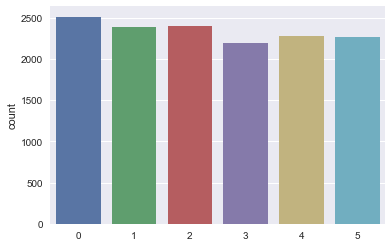

In [6]:
import seaborn as sns

sns.set(style='darkgrid')
sns.countplot(y_train)

In [7]:
X_train = X_train / 255
X_test = X_test / 255

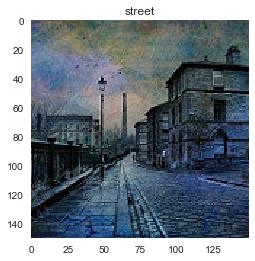

In [20]:
plt.figure()
plt.grid(False)
plt.imshow(X_test[112])
plt.title(class_names[y_test[112]])
plt.show()

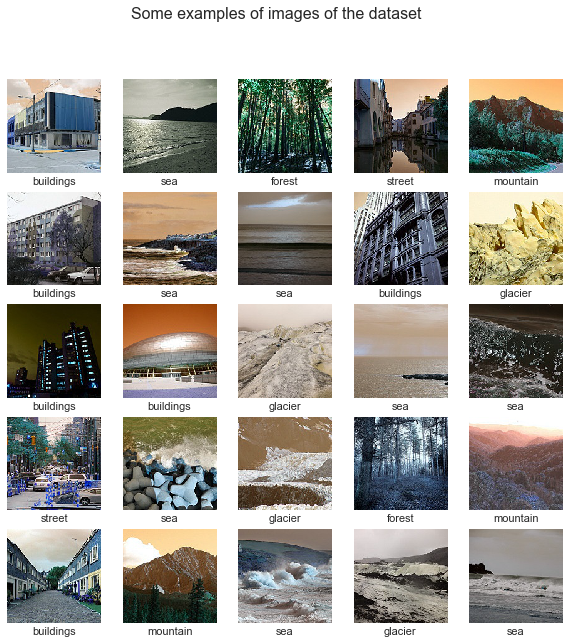

In [10]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())        
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='softmax'))          

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.compile(optimizer='adam', metrics=['accuracy'], loss = 'sparse_categorical_crossentropy')

In [13]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split = 0.2)

Instructions for updating:
Use tf.cast instead.
Train on 11227 samples, validate on 2807 samples
Epoch 1/5
11227/11227 [==============================] - 614s 55ms/step - loss: 1.1233 - acc: 0.5925 - val_loss: 0.8013 - val_acc: 0.6983
Epoch 2/5
11227/11227 [==============================] - 409s 36ms/step - loss: 0.7084 - acc: 0.7446 - val_loss: 0.7644 - val_acc: 0.7203
Epoch 3/5
11227/11227 [==============================] - 335s 30ms/step - loss: 0.5316 - acc: 0.8190 - val_loss: 0.6478 - val_acc: 0.7631
Epoch 4/5
11227/11227 [==============================] - 242s 22ms/step - loss: 0.4148 - acc: 0.8606 - val_loss: 0.6677 - val_acc: 0.7645
Epoch 5/5
11227/11227 [==============================] - 237s 21ms/step - loss: 0.3010 - acc: 0.9026 - val_loss: 0.6112 - val_acc: 0.7912


In [19]:
test_loss = model.evaluate(X_test, y_test)
test_loss

3000/3000 [==============================] - 17s 6ms/step


[0.6122531550725301, 0.7953333333333333]

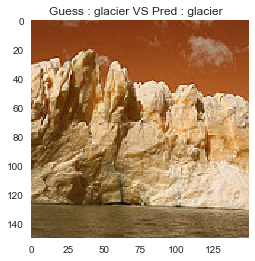

In [17]:
index = np.random.randint(X_test.shape[0]) 

img = (np.expand_dims(X_test[index], 0))
predictions = model.predict(img)     
pred_img = np.argmax(predictions[0]) 
pred_label = class_names[pred_img]
true_label = class_names[y_test[index]] 

title = 'Guess : {} VS Pred : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(X_test[index])
plt.grid(False)
plt.title(title)
plt.show()